## 1. Data Collection

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import xlrd
import matplotlib.dates as mdates

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from lightgbm import LGBMRegressor

In [2]:
# Importing data
df_groc_1 = pd.read_fwf('../data/saltsnck_groc_1687_1739')
df_groc_2 = pd.read_fwf('../data/saltsnck_groc_1635_1686')

### Groceries Dataframe

In [3]:
df_groc_1.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0


In [4]:
# Checking length of dataset
len_groc_1 = len(df_groc_1.index)
print(len_groc_1)

20777520


In [5]:
df_groc_2.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1635,0,3,78271,2060,6,12.00,NONE,0,1
1,234212,1635,0,3,78271,2061,4,8.79,NONE,0,1
2,234212,1635,0,1,84114,11336,5,15.00,NONE,0,0
3,234212,1635,0,1,84114,11391,4,12.00,NONE,0,0
4,234212,1635,0,1,84114,10990,8,21.96,NONE,0,1


In [6]:
# Checking length of dataset
len_groc_2 = len(df_groc_2.index)
print(len_groc_2)

19636683


In [7]:
df_groc = pd.concat([df_groc_1, df_groc_2], ignore_index=True)

In [8]:
df_groc.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0


In [9]:
# Checking new length of dataset
len_df_groc = len(df_groc.index)
if len_df_groc == (len_groc_1 + len_groc_2):
    print(f"Correctly concatinated: {len_df_groc}")
else:
    print("Please check dataframes")

Correctly concatinated: 40414203


### Attributes and Delivery Dataframe

In [10]:
# Importing data
df_attr = pd.read_fwf('../data/saltsnck_prod_attr')
df_stores = pd.read_fwf('../data/Delivery_Stores')

In [11]:
df_attr.head()

,SY,GE,VEND,ITEM,VOL_EQ,FLAVOR/SCENT,PACKAGE,PRODUCT TYPE,STORE,LOCATION,...,NUT.1,TYPE OF.14,POPCORN,TYPE OF.15,PREPARATION,TYPE OF.16,TOPPING,TYPE OF TORTILLA,TYPE OF.17,TORTILLA/KIT
0,0,1,2,72107,0.7500,KETTLE CORN,PLASTIC BAG,RTE POPCORN,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
1,0,1,2,80294,1.0000,SESAME,PLASTIC BAG,PRETZEL,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
2,0,1,2,80296,0.8500,SESAME,PLASTIC BAG,PRETZEL,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
3,0,1,2,83302,0.4844,MISSING,BAG,SNACK MIX,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
4,0,1,9,7436,1.1250,ASSORTED,TIN,RTE POPCORN,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN


In [12]:
df_attr.dtypes

SY                    int64
GE                    int64
VEND                  int64
ITEM                  int64
VOL_EQ              float64
                     ...   
TYPE OF.16           object
TOPPING              object
TYPE OF TORTILLA     object
TYPE OF.17           object
TORTILLA/KIT        float64
Length: 131, dtype: object

In [13]:
df_stores.head()

,IRI_KEY,OU,EST_ACV,Market_Name,Open,Clsd,MskdName
0,200032,GR,25.28099,NEW YORK,1539,1743,Chain5
1,200156,GR,16.52399,DETROIT,1689,1799,Chain44
2,200272,GR,11.09200,LOS ANGELES,873,9998,Chain107
3,200341,GR,25.69398,SAN DIEGO,1197,9998,Chain107
4,200379,GR,29.52299,SOUTH CAROLINA,1348,1719,Chain55


### Products and Week Dataframe

In [14]:
# Importing data
df_prod = pd.read_excel('../data/prod_saltsnck.xls')
df_week = pd.read_excel('../data/IRI week translation_2008_2017.xls')

In [15]:
df_prod.head()

,L1,L2,L3,L4,L5,L9,Level,UPC,SY,GE,...,ITEM,*STUBSPEC 1431RC,VOL_EQ,PRODUCT TYPE,PACKAGE,FLAVOR/SCENT,FAT CONTENT,COOKING METHOD,SALT/SODIUM CONTENT,TYPE OF CUT
0,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN BBQ PTCHP THN 6OZ,9,00-02-36300-04650,0,2,...,4650,+GORDN BBQ PTCHP THN 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,BARBECUE,MISSING,MISSING,MISSING,THIN
1,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN ORGL PTCHP FLAT 14.5OZ,9,00-01-36300-04632,0,1,...,4632,+GORDN ORGL PTCHP FLAT 14.5OZ 0 1 3...,0.9063,POTATO CHIP,PLASTIC BAG,ORIGINAL,MISSING,MISSING,MISSING,FLAT
2,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REDHT PTCHP RPLD 6OZ,9,00-02-36300-04652,0,2,...,4652,+GORDN REDHT PTCHP RPLD 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,RED HOT,MISSING,MISSING,MISSING,RIPPLED
3,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REG PTCHP RPLD 6OZ,9,00-03-36300-04641,0,3,...,4641,+GORDN REG PTCHP RPLD 6OZ 0 3 3...,0.3750,POTATO CHIP,BAG,REGULAR,MISSING,MISSING,MISSING,RIPPLED
4,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REG PTCHP THN 6OZ,9,00-02-36300-04640,0,2,...,4640,+GORDN REG PTCHP THN 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,REGULAR,MISSING,MISSING,MISSING,THIN


In [16]:
df_prod.dtypes

L1                      object
L2                      object
L3                      object
L4                      object
L5                      object
L9                      object
Level                    int64
UPC                     object
SY                       int64
GE                       int64
VEND                     int64
ITEM                     int64
*STUBSPEC 1431RC        object
VOL_EQ                 float64
PRODUCT TYPE            object
PACKAGE                 object
FLAVOR/SCENT            object
FAT CONTENT             object
COOKING METHOD          object
SALT/SODIUM CONTENT     object
TYPE OF CUT             object
dtype: object

In [17]:
df_week.head()

,IRI Week,Calendar week starting on,Calendar week ending on,Unnamed: 3,Calendar date,IRI Week.1
0,1479,2007-12-31,2008-01-06,NaN,1979-09-03,1.0
1,1480,2008-01-07,2008-01-13,NaN,NaT,NaN
2,1481,2008-01-14,2008-01-20,NaN,NaT,NaN
3,1482,2008-01-21,2008-01-27,NaN,NaT,NaN
4,1483,2008-01-28,2008-02-03,NaN,NaT,NaN


In [18]:
df_week = df_week.drop(columns=["Calendar date","IRI Week.1","Unnamed: 3"], axis=1)

In [19]:
df_week.head()

,IRI Week,Calendar week starting on,Calendar week ending on
0,1479,2007-12-31,2008-01-06
1,1480,2008-01-07,2008-01-13
2,1481,2008-01-14,2008-01-20
3,1482,2008-01-21,2008-01-27
4,1483,2008-01-28,2008-02-03


## 2. Data Preparation

### Merging Stores and Groceries Dataframe

In [20]:
# Checking length of dataset
print(len_df_groc)

40414203


In [21]:
df = df_groc.merge(df_stores, on='IRI_KEY')

In [22]:
# Checking new length of dataset
len_df_s1_before = len(df_groc.index)
len_df_s1_after = len(df.index)
if len_df_s1_before == len_df_s1_after:
    print(f"Correctly concatinated: {len_df_s1_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {(((len_df_s1_before - len_df_s1_after)/len_df_s1_before)*100):.5f}%")

Please check dataframes. Unmatched rows (%): 0.46335%


In [23]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,OU,EST_ACV,Market_Name,Open,Clsd,MskdName
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0,GR,34.04199,CHICAGO,435,9998,Chain42
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0,GR,34.04199,CHICAGO,435,9998,Chain42
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0,GR,34.04199,CHICAGO,435,9998,Chain42
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1,GR,34.04199,CHICAGO,435,9998,Chain42
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0,GR,34.04199,CHICAGO,435,9998,Chain42


In [24]:
df = df.merge(df_week.rename(columns={'IRI Week': 'WEEK'}), on='WEEK')

In [25]:
# Checking new length of dataset
len_df_s2_after = len(df.index)
if len_df_s1_after == len_df_s2_after:
    print(f"Correctly concatinated: {len_df_s2_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {(((len_df_s1_after - len_df_s2_after)/len_df_s1_after)*100):.5f}%")

Correctly concatinated: 40226945


In [26]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,OU,EST_ACV,Market_Name,Open,Clsd,MskdName,Calendar week starting on,Calendar week ending on
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01


In [27]:
df.dtypes

IRI_KEY                               int64
WEEK                                  int64
SY                                    int64
GE                                    int64
VEND                                  int64
ITEM                                  int64
UNITS                                 int64
DOLLARS                             float64
F                                    object
D                                     int64
PR                                    int64
OU                                   object
EST_ACV                             float64
Market_Name                          object
Open                                  int64
Clsd                                  int64
MskdName                             object
Calendar week starting on    datetime64[ns]
Calendar week ending on      datetime64[ns]
dtype: object

### UPC Creation

In [28]:
# Create a new column that concatenates SY, GE, VEND, and ITEM to create the UPC
df['UPC'] = df['SY'].astype(str).str.zfill(2) + '-' + df['GE'].astype(str).str.zfill(2) + '-' + df['VEND'].astype(str).str.zfill(5) + '-' + df['ITEM'].astype(str).str.zfill(5)

In [29]:
df.dtypes

IRI_KEY                               int64
WEEK                                  int64
SY                                    int64
GE                                    int64
VEND                                  int64
ITEM                                  int64
UNITS                                 int64
DOLLARS                             float64
F                                    object
D                                     int64
PR                                    int64
OU                                   object
EST_ACV                             float64
Market_Name                          object
Open                                  int64
Clsd                                  int64
MskdName                             object
Calendar week starting on    datetime64[ns]
Calendar week ending on      datetime64[ns]
UPC                                  object
dtype: object

In [30]:
df["UPC"].info

<bound method Series.info of 0           00-01-84114-11336
1           00-01-84114-11391
2           00-01-84114-10990
3           00-02-84114-10813
4           00-01-84114-00999
                  ...        
40226940    07-01-28229-01315
40226941    07-01-20495-39347
40226942    07-01-20495-39313
40226943    07-01-20495-39321
40226944    08-01-29515-30200
Name: UPC, Length: 40226945, dtype: object>

### Merging Main and Product Dataframe

In [31]:
from scipy.stats import chi2_contingency
import pandas as pd

def check_correlation(df1, df2, column1, column2):
    # Create ITEM column from the last 5 digits of the UPC column
    df1['ITEM'] = df1[column1].str[-5:]

    # Create a cross-tabulation table of the two columns
    crosstab = pd.crosstab(df1['ITEM'], df2[column2])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    # Print the results
    print(f"Chi-square value = {chi2}")
    print(f"p-value = {p}")

In [32]:
check_correlation(df_prod, df_prod, 'UPC', 'PRODUCT TYPE')

Chi-square value = 1601803.4819350592
p-value = 0.0


In [33]:
df_prod.head()

,L1,L2,L3,L4,L5,L9,Level,UPC,SY,GE,...,ITEM,*STUBSPEC 1431RC,VOL_EQ,PRODUCT TYPE,PACKAGE,FLAVOR/SCENT,FAT CONTENT,COOKING METHOD,SALT/SODIUM CONTENT,TYPE OF CUT
0,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN BBQ PTCHP THN 6OZ,9,00-02-36300-04650,0,2,...,04650,+GORDN BBQ PTCHP THN 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,BARBECUE,MISSING,MISSING,MISSING,THIN
1,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN ORGL PTCHP FLAT 14.5OZ,9,00-01-36300-04632,0,1,...,04632,+GORDN ORGL PTCHP FLAT 14.5OZ 0 1 3...,0.9063,POTATO CHIP,PLASTIC BAG,ORIGINAL,MISSING,MISSING,MISSING,FLAT
2,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REDHT PTCHP RPLD 6OZ,9,00-02-36300-04652,0,2,...,04652,+GORDN REDHT PTCHP RPLD 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,RED HOT,MISSING,MISSING,MISSING,RIPPLED
3,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REG PTCHP RPLD 6OZ,9,00-03-36300-04641,0,3,...,04641,+GORDN REG PTCHP RPLD 6OZ 0 3 3...,0.3750,POTATO CHIP,BAG,REGULAR,MISSING,MISSING,MISSING,RIPPLED
4,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REG PTCHP THN 6OZ,9,00-02-36300-04640,0,2,...,04640,+GORDN REG PTCHP THN 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,REGULAR,MISSING,MISSING,MISSING,THIN


In [34]:
# # Only for UPC merging: Function to drop duplicate columns
# def drop_duplicate_columns(df1, df2, exclude='UPC'):
#     # Get the column names from both dataframes
#     df1_columns = set(df1.columns)
#     df2_columns = set(df2.columns)

#     # Find common columns
#     common_columns = df1_columns.intersection(df2_columns)

#     # Exclude the specified column from being removed
#     if exclude in common_columns:
#         common_columns.remove(exclude)

#     # Drop common columns from df2
#     df2 = df2.drop(columns=common_columns)
    
#     return df2

In [35]:
# # Only for UPC merging: Dropping the duplicate columns in the product attributes dataframe
# df_prod = drop_duplicate_columns(df, df_prod)

In [36]:
# Only for UPC merging: merging the main dataframe with the product attributes dataframe
#df = pd.merge(df,df_prod, on="UPC", how='left')

In [37]:
# Searching VEND number for Pepsico INC
vend_unique_df = df_prod[['VEND', 'L3']].drop_duplicates()

In [38]:
vend_duplicates = vend_unique_df.groupby('VEND')['L3'].value_counts()

# Check if there are any duplicates
duplicates = vend_duplicates[vend_duplicates > 1]

if len(vend_duplicates) > 0:
    print(vend_duplicates)
else:
    print("No duplicates found")

VEND   L3                           
1      PEPSICO INC                      1
       THOMASSON POTATO CHIP CO         1
2      PEPSICO INC                      1
       SERVATII PASTRY SHOP AND DELI    1
7      BETTER MADE SNACK FOODS INC      1
                                       ..
99237  MERCADO LATINO OF L A            1
99349  KITCH'N COOK'D POTATO CHIP       1
99434  TELL CITY PRETZEL COMPANY        1
99998  PRIVATE LABEL                    1
99999  GENERIC                          1
Name: L3, Length: 1278, dtype: int64


In [39]:
df = df.merge(vend_unique_df, on='VEND', how="left")

In [40]:
# Checking new length of dataset
len_df_s3_after = len(df.index)
if len_df_s2_after == len_df_s3_after:
    print(f"Correctly concatinated: {len_df_s3_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {(((len_df_s2_after - len_df_s3_after)/len_df_s3_after)*100):.5f}%")

Please check dataframes. Unmatched rows (%): -32.81758%


In [41]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,...,OU,EST_ACV,Market_Name,Open,Clsd,MskdName,Calendar week starting on,Calendar week ending on,UPC,L3
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-01-84114-11336,KETTLE FOODS INC
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-01-84114-11391,KETTLE FOODS INC
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-01-84114-10990,KETTLE FOODS INC
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-02-84114-10813,KETTLE FOODS INC
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-01-84114-00999,KETTLE FOODS INC


In [42]:
df.dtypes

IRI_KEY                               int64
WEEK                                  int64
SY                                    int64
GE                                    int64
VEND                                  int64
ITEM                                  int64
UNITS                                 int64
DOLLARS                             float64
F                                    object
D                                     int64
PR                                    int64
OU                                   object
EST_ACV                             float64
Market_Name                          object
Open                                  int64
Clsd                                  int64
MskdName                             object
Calendar week starting on    datetime64[ns]
Calendar week ending on      datetime64[ns]
UPC                                  object
L3                                   object
dtype: object

In [43]:
df_prod['ITEM'] = df_prod['UPC'].str[-5:].astype(int)

In [44]:
# Searching VEND number for Pepsico INC
item_unique_df = df_prod[['ITEM', 'PRODUCT TYPE']].drop_duplicates()

In [45]:
item_duplicates = item_unique_df.groupby('ITEM')['PRODUCT TYPE'].value_counts()

# Check if there are any duplicates
item_duplicates = item_duplicates[item_duplicates > 1]

if len(item_duplicates) > 0:
    print(item_duplicates)
else:
    print("No duplicates found")

No duplicates found


In [46]:
df = df.merge(item_unique_df, on='ITEM', how='left')

In [47]:
# Checking new length of dataset
len_df_s4_after = len(df.index)
if len_df_s3_after == len_df_s4_after:
    print(f"Correctly concatinated: {len_df_s4_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {(((len_df_s3_after - len_df_s4_after)/len_df_s4_after)*100):.5f}%")

Please check dataframes. Unmatched rows (%): -33.17150%


In [48]:
# Make sure 'Calendar week starting on' and 'Calendar week ending on' are datetime objects
df['Calendar week starting on'] = pd.to_datetime(df['Calendar week starting on'])
df['Calendar week ending on'] = pd.to_datetime(df['Calendar week ending on'])

# Rename the column
df = df.rename(columns={'Calendar week starting on': 'CALENDAR_DATE'})

In [49]:
# Dropping column for VEND merger
df = df.drop(columns=["Open","Clsd","SY","GE","OU","VEND","ITEM","F", "Calendar week ending on"], axis=1)
#df = df.drop(columns=["Open","Clsd","SY","GE","OU","VEND","ITEM","F", "Calendar week ending on","L1","L2","L4","L5","Level","PACKAGE","FLAVOR/SCENT", "FAT CONTENT", "COOKING METHOD", "SALT/SODIUM CONTENT", "TYPE OF CUT","*STUBSPEC 1431RC"], axis=1)

In [50]:
df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
Market_Name              object
MskdName                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
PRODUCT TYPE             object
dtype: object

In [51]:
# Filter for the New York area
ny_df = df[(df['Market_Name'] == 'NEW YORK')].copy()

In [52]:
print(len(ny_df.index))

8032674


In [53]:
def rename_columns(df):
    df.columns = map(str.upper, df.columns)
    return df

In [54]:
ny_df = rename_columns(ny_df)

In [55]:
ny_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
PRODUCT TYPE             object
dtype: object

## 3. Data Cleaning & Feature Engineering

In [56]:
# Creating average price variable
ny_df['AVG_PRICE'] = (ny_df['DOLLARS'] / ny_df['UNITS']).round(2)

In [57]:
ny_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
PRODUCT TYPE             object
AVG_PRICE               float64
dtype: object

/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_88184/589674640.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ny_correlation_matrix = ny_df.corr()


<Axes: >

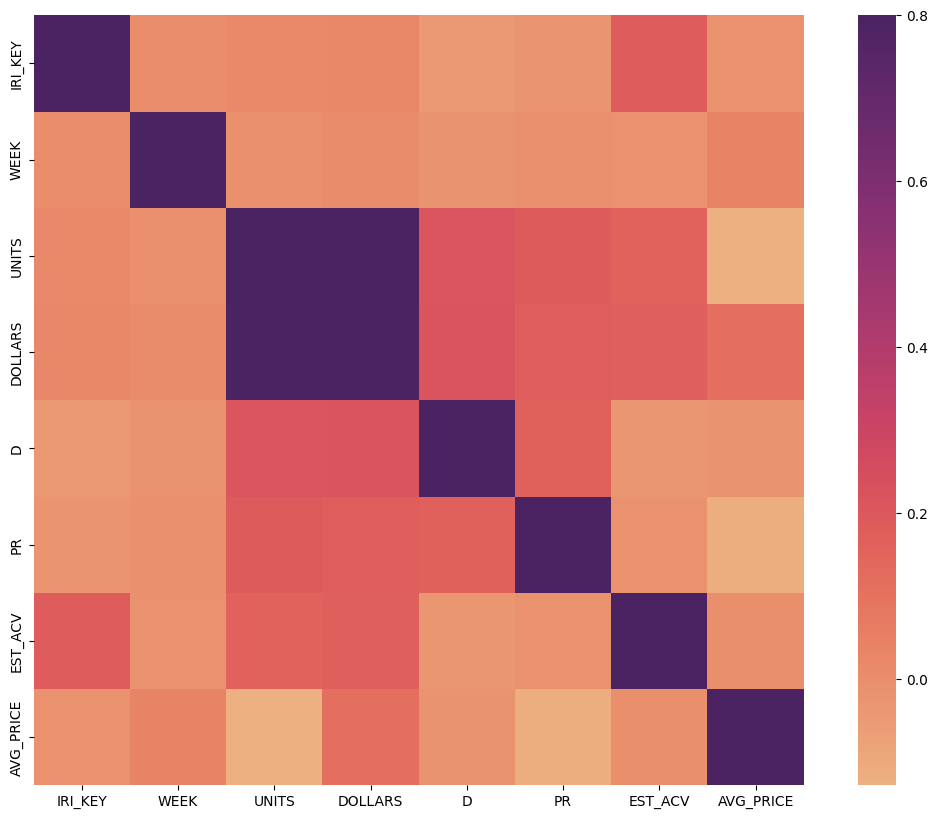

In [58]:
# Showing a correlation matrix heatmap of all variables
ny_correlation_matrix = ny_df.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(ny_correlation_matrix, vmax=.8, square=True, cmap="flare")

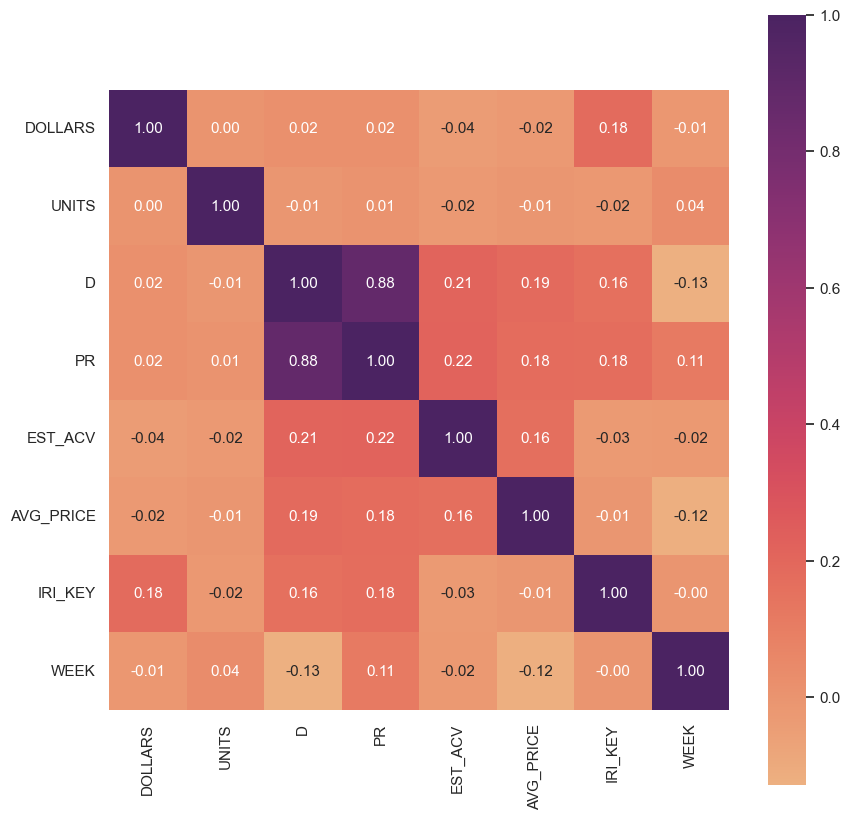

In [59]:
# Showing a correlation matrix heatmap of the eleven highest correlated variables with the outcome variable
columns = ny_correlation_matrix.nlargest(11, 'DOLLARS')['DOLLARS'].index
ny_top_correlation_matrix = np.corrcoef(ny_df[columns].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(ny_correlation_matrix, cbar=True, annot=True, square=True, cmap="flare", fmt='.2f', annot_kws={'size': 11}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [60]:
# Filter promotion to exclude promotons for model building
ny_baseline_df = ny_df[ny_df['PR'] <= 0.1].copy()

In [61]:
ny_baseline_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
PRODUCT TYPE             object
AVG_PRICE               float64
dtype: object

In [62]:
# First, ensure your DataFrame is sorted by the 'Calendar Date' column
ny_baseline_df = ny_baseline_df.sort_values(by=['UPC', 'MARKET_NAME', 'MSKDNAME', 'IRI_KEY', 'CALENDAR_DATE'])

# Applying the rolling max function with a window of 8 (7 preceding rows + current row)
ny_baseline_df['MAX_AVG_PRICE'] = ny_baseline_df.groupby(['UPC', 'MARKET_NAME', 'MSKDNAME', 'IRI_KEY'])['AVG_PRICE'].apply(lambda x: x.rolling(window=9, min_periods=1).max()) 

/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_88184/400194684.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ny_baseline_df['MAX_AVG_PRICE'] = ny_baseline_df.groupby(['UPC', 'MARKET_NAME', 'MSKDNAME', 'IRI_KEY'])['AVG_PRICE'].apply(lambda x: x.rolling(window=9, min_periods=1).max())


In [63]:
print(len(ny_baseline_df.index))

5984379


In [64]:
ny_baseline_df.head()

,IRI_KEY,WEEK,UNITS,DOLLARS,D,PR,EST_ACV,MARKET_NAME,MSKDNAME,CALENDAR_DATE,UPC,L3,PRODUCT TYPE,AVG_PRICE,MAX_AVG_PRICE
47762842,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,POTATO CHIP,1.49,1.49
47762843,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,POTATO CRISP,1.49,1.49
47762844,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,TORTILLA CHIP,1.49,1.49
47762845,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,PRETZEL,1.49,1.49
47762846,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,RTE POPCORN,1.49,1.49


In [65]:
# Filter promotion to exclude promotons for model building
ny_promo_df = ny_df[ny_df['PR'] > 0.1].copy()

In [66]:
print(len(ny_promo_df.index))

2048295


In [67]:
ny_promo_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
PRODUCT TYPE             object
AVG_PRICE               float64
dtype: object

In [68]:
# Ensure both dataframes have the same columns
ny_promo_df = ny_promo_df.reindex(columns = ny_baseline_df.columns)

# Stacking both dataframes
ny_stacked_df = pd.concat([ny_baseline_df, ny_promo_df], ignore_index=True).copy()

In [69]:
print(len(ny_stacked_df.index))

8032674


In [70]:
# Sort the dataframe
ny_stacked_df = ny_stacked_df.sort_values(by=['UPC', 'MARKET_NAME', 'MSKDNAME', 'IRI_KEY', 'CALENDAR_DATE'], ascending=[True, True, True, True, True])

In [71]:
ny_stacked_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
PRODUCT TYPE             object
AVG_PRICE               float64
MAX_AVG_PRICE           float64
dtype: object

In [72]:
# Rename "Avg Price Max" to "Regular price"
ny_stacked_df = ny_stacked_df.rename(columns={'MAX_AVG_PRICE': 'REG_PRICE'})

# Fill empty cells of regular price with previous value (row - 1)
ny_stacked_df['REG_PRICE'] = ny_stacked_df['REG_PRICE'].fillna(method='ffill')

# Create column "Discount" with formula (2 decimal places in %): (Regular Price - Avg Price) / Regular Price
ny_stacked_df['DISCOUNT'] = ((ny_stacked_df['REG_PRICE'] - ny_stacked_df['AVG_PRICE']) / ny_stacked_df['REG_PRICE']).round(2)

In [73]:
print(len(ny_stacked_df.index))

8032674


In [74]:
ny_stacked_df.head()

,IRI_KEY,WEEK,UNITS,DOLLARS,D,PR,EST_ACV,MARKET_NAME,MSKDNAME,CALENDAR_DATE,UPC,L3,PRODUCT TYPE,AVG_PRICE,REG_PRICE,DISCOUNT
0,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,POTATO CHIP,1.49,1.49,0.0
1,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,POTATO CRISP,1.49,1.49,0.0
2,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,TORTILLA CHIP,1.49,1.49,0.0
3,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,PRETZEL,1.49,1.49,0.0
4,218539,1635,1,1.49,0,0,46.25497,NEW YORK,Chain112,2010-12-27,00-01-00901-00003,RAB HOLDINGS,RTE POPCORN,1.49,1.49,0.0


In [75]:
# Group by 'MSKDNAME', sum 'DOLLARS', and sort the result
dollar_sums = ny_stacked_df.groupby('PRODUCT TYPE')['DOLLARS'].sum().sort_values(ascending=False)

# Print the result
print(dollar_sums)

PRODUCT TYPE
POTATO CHIP        24561930.01
PRETZEL            24094851.80
RTE POPCORN        21785057.62
TORTILLA CHIP      15393879.45
FRIED PORK RIND     8272207.49
                      ...     
POTATO FRIES            312.38
CORN STICK               85.84
BEAN CHIP                66.98
SNOW PEA SNACK            4.98
HUMMUS CHIP               2.89
Name: DOLLARS, Length: 81, dtype: float64


In [76]:
product_type = "RTE POPCORN"

In [77]:
# Filter for 'PRODUCT TYPE' == product_type
product_df = ny_stacked_df[ny_stacked_df['PRODUCT TYPE'] == product_type]

# Group by 'MSKDNAME', sum 'DOLLARS', and sort the result
dollar_sums = product_df.groupby('MSKDNAME')['DOLLARS'].sum().sort_values(ascending=False)

# Print the result
print(dollar_sums)

MSKDNAME
Chain112    4699180.76
Chain98     4616581.86
Chain5      4154258.57
Chain73     1890795.67
Chain110    1570732.84
Chain51     1560346.46
Chain4       821343.93
Chain29      784418.19
Chain52      746675.22
Chain1       721495.37
Chain13      219228.75
Name: DOLLARS, dtype: float64


In [78]:
chain = "Chain112"

In [93]:
# Filter the DataFrame
ny_top20_df = ny_stacked_df[(ny_stacked_df['PRODUCT TYPE'] == product_type) & 
                                    (ny_stacked_df['MSKDNAME'] == chain)].copy()

# Group by 'UPC', 'PRODUCT TYPE', and 'MSKDNAME', aggregate by summing 'DOLLARS' and count the number of rows in each group
ny_top20_df = ny_top20_df.groupby(['UPC', 'PRODUCT TYPE', 'MSKDNAME']).agg(DOLLARS_SUM=('DOLLARS', 'sum'), COUNT=('UPC', 'count')).reset_index()

# Sort the DataFrame by 'DOLLARS' in descending order
ny_top20_df = ny_top20_df.sort_values('DOLLARS_SUM', ascending=False)

# Get the top 20 rows based on 'DOLLARS'
ny_top20_df = ny_top20_df.nlargest(20, 'DOLLARS_SUM')

In [94]:
ny_top20_df.head(50)

,UPC,PRODUCT TYPE,MSKDNAME,DOLLARS_SUM,COUNT
179,00-03-28400-06408,RTE POPCORN,Chain112,449999.08,1366
130,00-02-28400-06408,RTE POPCORN,Chain112,419841.62,1246
127,00-02-28400-06404,RTE POPCORN,Chain112,358741.76,2716
128,00-02-28400-06405,RTE POPCORN,Chain112,289179.06,2716
129,00-02-28400-06406,RTE POPCORN,Chain112,223597.56,2662
126,00-02-28400-01109,RTE POPCORN,Chain112,214982.94,2700
82,00-01-72600-00562,RTE POPCORN,Chain112,176843.21,1251
239,00-09-28400-00303,RTE POPCORN,Chain112,169673.66,1232
235,00-06-41780-00011,RTE POPCORN,Chain112,100816.67,1357
240,00-09-28400-00308,RTE POPCORN,Chain112,68670.80,860


In [95]:
print(len(ny_top20_df.index))

20


In [118]:
# Filter the DataFrame
ny_all_df = ny_stacked_df[(ny_stacked_df['PRODUCT TYPE'] == product_type) & 
                                    (ny_stacked_df['MSKDNAME'] == chain)].copy()

# Group by 'UPC', 'MARKET_NAME', 'MSKDNAME', and 'CALENDAR_DATE', and perform the aggregation
ny_all_df = ny_all_df.groupby(['UPC', 'MARKET_NAME', 'MSKDNAME', 'CALENDAR_DATE']).agg(
    UNITS_SUM=('UNITS', 'sum'),
    DOLLARS_SUM=('DOLLARS', 'sum'),
    #VOL_EQ_SUM=('VOL_EQ', 'sum'),
    AVG_PRICE_MEAN=('AVG_PRICE', 'mean'),
    D_MEAN=('D', 'mean'),
    PR_MEAN=('PR', 'mean'),
    EST_ACV_MEAN=('EST_ACV', 'mean'),
    REG_PRICE_MEAN=('REG_PRICE', 'mean'),
    DISCOUNT_MEAN=('DISCOUNT', 'mean'),
).reset_index()

In [119]:
ny_all_df.head()

,UPC,MARKET_NAME,MSKDNAME,CALENDAR_DATE,UNITS_SUM,DOLLARS_SUM,AVG_PRICE_MEAN,D_MEAN,PR_MEAN,EST_ACV_MEAN,REG_PRICE_MEAN,DISCOUNT_MEAN
0,00-01-00901-00003,NEW YORK,Chain112,2010-12-27,25,37.25,1.49,0.000000,0.0,59.951303,1.49,0.0
1,00-01-00901-00003,NEW YORK,Chain112,2011-01-03,20,29.80,1.49,0.166667,0.0,59.951303,1.49,0.0
2,00-01-00901-00003,NEW YORK,Chain112,2011-01-10,27,40.23,1.49,0.166667,0.0,56.313968,1.49,0.0
3,00-01-00901-00003,NEW YORK,Chain112,2011-01-17,10,14.90,1.49,0.200000,0.0,59.128368,1.49,0.0
4,00-01-00901-00003,NEW YORK,Chain112,2011-01-24,9,13.41,1.49,0.000000,0.0,58.430307,1.49,0.0


In [120]:
print(len(ny_all_df.index))

18963


In [121]:
# First, rename 'UPC' in the second dataframe to 'join_UPC' to avoid a collision in column names
ny_top20_df = ny_top20_df.rename(columns={'UPC': 'join_UPC'})

# Merge the two dataframes
ny_train_df = ny_all_df.merge(ny_top20_df[['join_UPC']], left_on='UPC', right_on='join_UPC', how='left').copy()

# Drop rows with missing values in the 'join_UPC' column
ny_train_df = ny_train_df.dropna(subset=['join_UPC'])

# Drop the 'join_UPC' column itself
ny_train_df = ny_train_df.drop(columns=['join_UPC'])

# Display the dataframe
ny_train_df


,UPC,MARKET_NAME,MSKDNAME,CALENDAR_DATE,UNITS_SUM,DOLLARS_SUM,AVG_PRICE_MEAN,D_MEAN,PR_MEAN,EST_ACV_MEAN,REG_PRICE_MEAN,DISCOUNT_MEAN
976,00-01-20685-00027,NEW YORK,Chain112,2011-02-14,3,10.47,3.490000,0.000000,0.000000,16.366000,3.490000,0.000000
977,00-01-20685-00027,NEW YORK,Chain112,2011-02-21,17,58.34,3.326667,0.000000,0.000000,44.558653,3.326667,0.000000
978,00-01-20685-00027,NEW YORK,Chain112,2011-02-28,87,217.50,2.500000,0.000000,0.375000,61.208973,2.810000,0.091250
979,00-01-20685-00027,NEW YORK,Chain112,2011-03-07,154,385.00,2.500000,0.000000,0.272727,58.758883,2.725455,0.066364
980,00-01-20685-00027,NEW YORK,Chain112,2011-03-14,84,293.16,3.490000,0.272727,0.000000,56.138521,3.490000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
15556,08-01-43571-00015,NEW YORK,Chain112,2012-11-26,19,72.01,3.790000,0.000000,0.000000,58.229827,3.790000,0.000000
15557,08-01-43571-00015,NEW YORK,Chain112,2012-12-03,99,375.21,3.790000,0.181818,0.000000,57.465975,3.790000,0.000000
15558,08-01-43571-00015,NEW YORK,Chain112,2012-12-10,106,401.74,3.790000,0.166667,0.000000,55.619892,3.790000,0.000000
15559,08-01-43571-00015,NEW YORK,Chain112,2012-12-17,127,481.33,3.790000,0.166667,0.000000,55.619892,3.790000,0.000000


In [122]:
ny_train_df.head()

,UPC,MARKET_NAME,MSKDNAME,CALENDAR_DATE,UNITS_SUM,DOLLARS_SUM,AVG_PRICE_MEAN,D_MEAN,PR_MEAN,EST_ACV_MEAN,REG_PRICE_MEAN,DISCOUNT_MEAN
976,00-01-20685-00027,NEW YORK,Chain112,2011-02-14,3,10.47,3.490000,0.000000,0.000000,16.366000,3.490000,0.000000
977,00-01-20685-00027,NEW YORK,Chain112,2011-02-21,17,58.34,3.326667,0.000000,0.000000,44.558653,3.326667,0.000000
978,00-01-20685-00027,NEW YORK,Chain112,2011-02-28,87,217.50,2.500000,0.000000,0.375000,61.208973,2.810000,0.091250
979,00-01-20685-00027,NEW YORK,Chain112,2011-03-07,154,385.00,2.500000,0.000000,0.272727,58.758883,2.725455,0.066364
980,00-01-20685-00027,NEW YORK,Chain112,2011-03-14,84,293.16,3.490000,0.272727,0.000000,56.138521,3.490000,0.000000


In [123]:
print(len(ny_train_df))

1888


/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_88184/3973731270.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ny_correlation_matrix = ny_train_df.corr()


<Axes: >

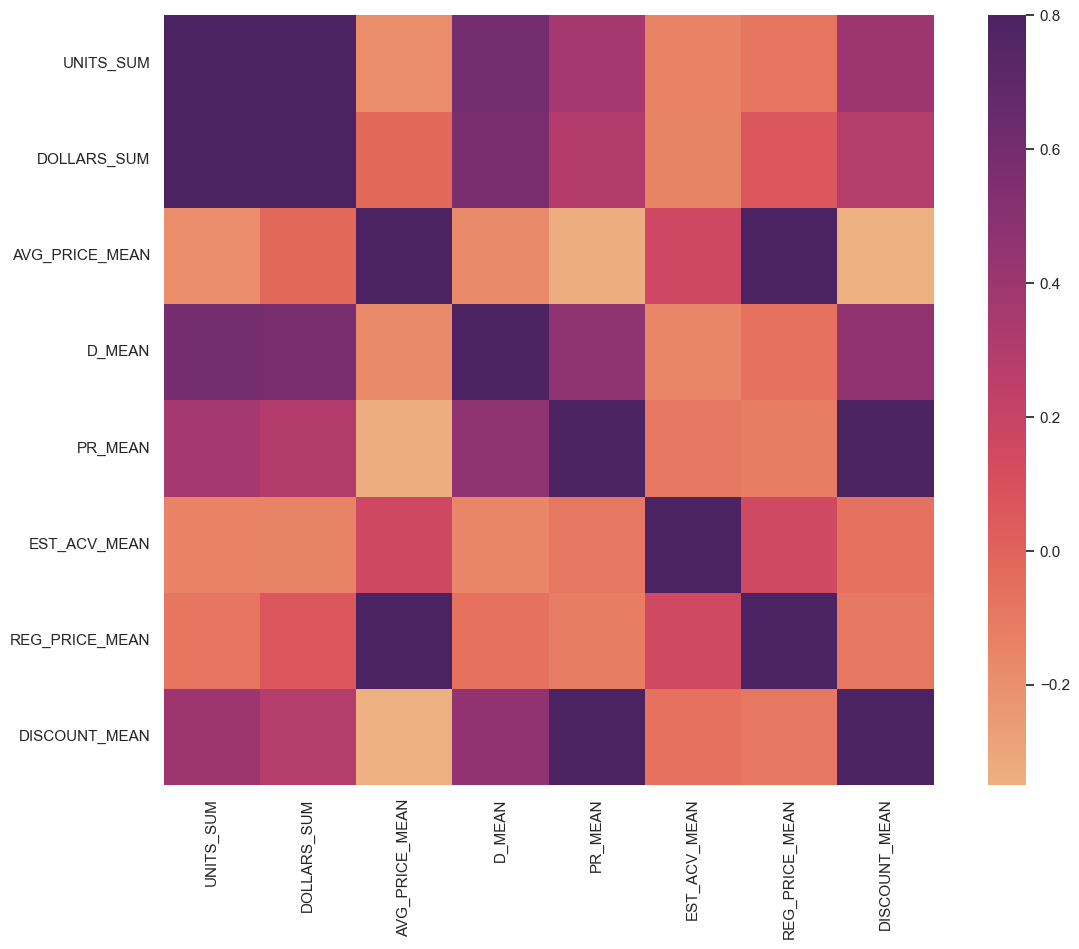

In [124]:
# Showing a correlation matrix heatmap of all variables
ny_correlation_matrix = ny_train_df.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(ny_correlation_matrix, vmax=.8, square=True, cmap="flare")

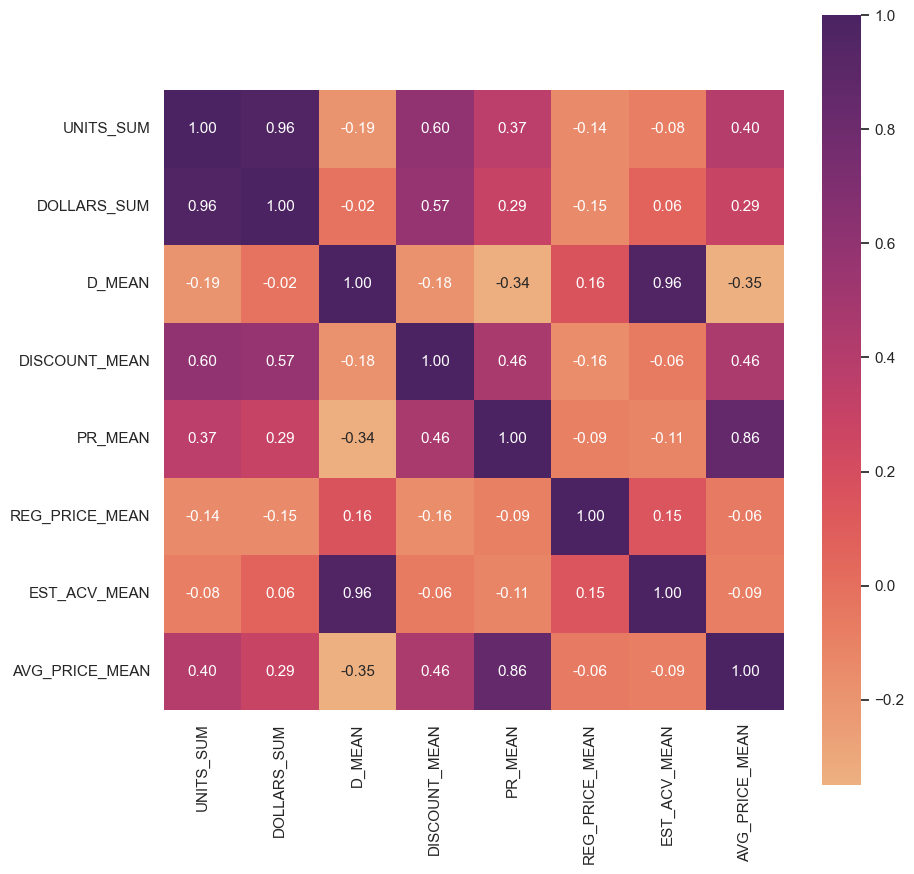

In [125]:
# Showing a correlation matrix heatmap of the eleven highest correlated variables with the outcome variable
columns = ny_correlation_matrix.nlargest(11, 'UNITS_SUM')['UNITS_SUM'].index
ny_top_correlation_matrix = np.corrcoef(ny_train_df[columns].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(ny_correlation_matrix, cbar=True, annot=True, square=True, cmap="flare", fmt='.2f', annot_kws={'size': 11}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

## 5. Data Modelling

In [126]:
# Drop unnecessary columns
drop_columns = ['MARKET_NAME', 'MSKDNAME', 'DOLLARS_SUM', 'AVG_PRICE_MEAN', 'EST_ACV_MEAN', 'REG_PRICE_MEAN'] #, 'VOL_EQ_SUM']
ny_train_df = ny_train_df.drop(drop_columns, axis=1)

In [127]:
# Compute quarter of each date (value between 1 and 4)
ny_train_df['quarter'] = ny_train_df['CALENDAR_DATE'].dt.quarter

# Add additional cyclical features for month and day
ny_train_df['month_sin'] = np.sin(2 * np.pi * ny_train_df['CALENDAR_DATE'].dt.month / 12)
ny_train_df['month_cos'] = np.cos(2 * np.pi * ny_train_df['CALENDAR_DATE'].dt.month / 12)
ny_train_df['quarter_sin'] = np.sin(2 * np.pi * ny_train_df['quarter'] / 4)
ny_train_df['quarter_cos'] = np.cos(2 * np.pi * ny_train_df['quarter'] / 4)
ny_train_df['day_sin'] = np.sin(2 * np.pi * ny_train_df['CALENDAR_DATE'].dt.day / 31)
ny_train_df['day_cos'] = np.cos(2 * np.pi * ny_train_df['CALENDAR_DATE'].dt.day / 31)

# Drop original date column
ny_train_df.drop('CALENDAR_DATE', axis=1, inplace=True)

In [128]:
# Define MAPE function
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['D_MEAN', 'PR_MEAN', 'DISCOUNT_MEAN', 'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'day_sin', 'day_cos']),
        ('cat', OneHotEncoder(), ['UPC']),
    ])

# Define models
models = [
    ('Ridge', Ridge()),
    ('RandomForest', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('DecisionTree', DecisionTreeRegressor()),
    ('LightGBM', LGBMRegressor()),
]

# Define a Time Series Split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'Ridge': {'model__alpha': [1,0.1,0.01,0.001,0.0001,0]},
    'RandomForest': {'model__n_estimators': [100, 200, 500], 'model__max_depth': [None, 10, 20, 30]},
    'XGBoost': {'model__n_estimators': [100, 200, 500], 'model__learning_rate': [0.01, 0.05, 0.1]},
    'GradientBoosting': {'model__n_estimators': [100, 200, 500], 'model__learning_rate': [0.01, 0.05, 0.1]},
    'DecisionTree': {'model__max_depth': [None, 10, 20, 30]},
    'LightGBM': {'model__n_estimators': [100, 200, 500], 'model__learning_rate': [0.01, 0.05, 0.1]},
}

# Sort dataframe by date
ny_train_df.sort_values(['month_sin', 'month_cos', 'quarter_sin', 'quarter_cos', 'day_sin', 'day_cos'], inplace=True)

# Split the data into train and test sets
test_size = int(len(ny_train_df) * 0.3)  # 20% of data as test set
train = ny_train_df[:-test_size]
test = ny_train_df[-test_size:]

X_train = train.drop('UNITS_SUM', axis=1)
y_train = train['UNITS_SUM']
X_test = test.drop('UNITS_SUM', axis=1)
y_test = test['UNITS_SUM']

for name, model in models:
    # Make pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Set up GridSearchCV
    gscv = GridSearchCV(pipeline, param_grid[name], cv=tscv, n_jobs=-1)

    # Fit the model
    gscv.fit(X_train, y_train)

    print(f"Best parameters for {name}: {gscv.best_params_}")

    # Predict
    y_pred = gscv.predict(X_test)

    # Evaluate
    print(f"---- {name} ----")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")

    # Calculate and print MAPE as well
    mape_value = mape(y_test, y_pred)
    print(f"MAPE: {mape_value}")

Best parameters for Ridge: {'model__alpha': 0.0001}
---- Ridge ----
R2 Score: 0.5750350809709526
MAE: 209.46008880083576
MSE: 273756.2249808681
MAPE: 84.35185306264451
Best parameters for RandomForest: {'model__max_depth': 30, 'model__n_estimators': 200}
---- RandomForest ----
R2 Score: 0.6432074089332014
MAE: 168.6064736074716
MSE: 229840.60203075982
MAPE: 63.093476647547774
Best parameters for XGBoost: {'model__learning_rate': 0.05, 'model__n_estimators': 100}
---- XGBoost ----
R2 Score: 0.5807258383952374
MAE: 177.99838380847297
MSE: 270090.32174981205
MAPE: 87.75387810355545
Best parameters for GradientBoosting: {'model__learning_rate': 0.05, 'model__n_estimators': 500}
---- GradientBoosting ----
R2 Score: 0.6469175668137169
MAE: 164.11974936661773
MSE: 227450.57224248096
MAPE: 66.50274088952726
Best parameters for DecisionTree: {'model__max_depth': 30}
---- DecisionTree ----
R2 Score: 0.5234868526670184
MAE: 208.7703180212014
MSE: 306962.8445229682
MAPE: 86.26887567323793
Best par

## 6. Interpretation

Our team has continued utilizing the advanced data science platform, Dataiku, in the pursuit of rigorous analysis and evaluation. By leveraging its comprehensive suite of tools, we've managed to extend our modeling capabilities to enhance the accuracy and reliability of our outcomes. By employing Dataiku, we've ensured that our results are comparable and consistent across various data sets, enabling us to make informed and data-driven decisions. However, through our research and development activities, it has become apparent that further enhancement of our model performance is possible.

The Lasso Lars model has performed reasonably well in our evaluation. An explained variance score of 0.8635 indicates that the model explains roughly 86.35% of the variance in our target variable, which is quite high. The R2 score, often interpreted as the proportion of the total variance in the target that is accounted for by the model, is 0.8629, further emphasizing the model's decent performance.

However, the model's prediction errors, as shown by the Mean Absolute Error (MAE) of 141 and the Mean Squared Error (MSE) of 76,910, suggest there's room for improvement. The high Mean Absolute Percentage Error (MAPE) of 40.82% also indicates that the model's predictions can, on average, deviate from the actual values by about 40.82%.

The Pearson coefficient of 0.9306 denotes a very strong positive linear correlation between the model's predictions and actual values, which is a positive indicator. However, due to relatively high error metrics (MAE, MSE, and MAPE), we can infer that while the model is generally accurate, it can occasionally generate predictions that are significantly off from the actual values.

In summary, Lasso Lars is a good predictive model but there's room for improvement in terms of reducing prediction errors.

![Modelling results.png](<attachment:Modelling results.png>)
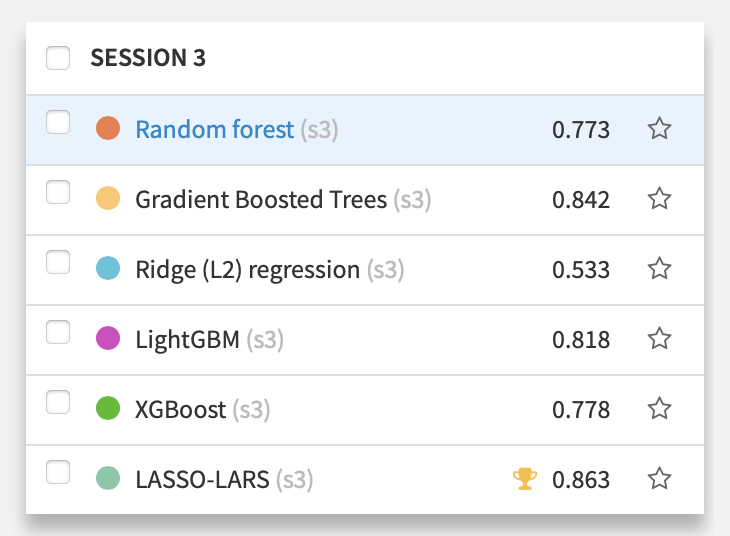